範例程式：https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d

# 初始參數設定

In [1]:
img_width, img_height = 250, 250

train_data_dir = 'data/train'
validation_data_dir = 'data/test'
pred_data_dir = 'data/pred'
nb_train_samples = 1000
nb_validation_samples = 250
epochs = 10
batch_size = 20

# 建立CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 1),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

# 載入資料以及資料擴增

介紹：https://chtseng.wordpress.com/2017/11/11/data-augmentation-%E8%B3%87%E6%96%99%E5%A2%9E%E5%BC%B7/

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import exposure

datagen = ImageDataGenerator(rescale=1. / 255,
                             fill_mode='nearest')
# this is the augmentation configuration we will use for training
train_datagen = datagen
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = datagen
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
#https://keras.io/preprocessing/image/#flow_from_directory
train_generator = train_datagen.flow_from_directory(train_data_dir,  # this is the target directory
                                                    color_mode='grayscale',
                                                    target_size=(img_width, img_height),  # all images will be resized
                                                    batch_size=batch_size,
                                                    class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels


validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        color_mode='grayscale',
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 831 images belonging to 7 classes.
Found 210 images belonging to 7 classes.


# 開始訓練

In [5]:
import PIL
history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples//batch_size,#程式會自動根據step_per_epoch*batch_size來生成圖片
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/10
50/50 [==============================] - 93s 2s/step - loss: 1.9012 - acc: 0.2379 - val_loss: 1.4479 - val_acc: 0.4652
Epoch 2/10
50/50 [==============================] - 86s 2s/step - loss: 1.1034 - acc: 0.5945 - val_loss: 0.7490 - val_acc: 0.7652
Epoch 3/10
50/50 [==============================] - 91s 2s/step - loss: 0.6263 - acc: 0.7704 - val_loss: 0.5643 - val_acc: 0.8217
Epoch 4/10
50/50 [==============================] - 84s 2s/step - loss: 0.3610 - acc: 0.8642 - val_loss: 0.5646 - val_acc: 0.8348
Epoch 5/10
50/50 [==============================] - 92s 2s/step - loss: 0.2134 - acc: 0.9282 - val_loss: 0.5950 - val_acc: 0.8522
Epoch 6/10
50/50 [==============================] - 85s 2s/step - loss: 0.1721 - acc: 0.9402 - val_loss: 0.5800 - val_acc: 0.8913
Epoch 7/10
50/50 [==============================] - 85s 2s/step - loss: 0.1188 - acc: 0.9630 - val_loss: 0.6017 - val_acc: 0.8652
Epoch 8/10
50/50 [==============================] - 87s 2s/step - loss: 0.1062 - acc: 0.96

模型載入教學
https://ithelp.ithome.com.tw/articles/10191627

fit_genetator講解：
https://medium.com/difference-engine-ai/keras-a-thing-you-should-know-about-keras-if-you-plan-to-train-a-deep-learning-model-on-a-large-fdd63ce66bd2
https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

類似辨識：https://blog.csdn.net/sinat_26917383/article/details/72861152

# 畫圖

In [6]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    legendLoc = 'lower right' if(train=='acc') else 'upper right'
    plt.legend(['train', 'validation'], loc=legendLoc)
    plt.show()

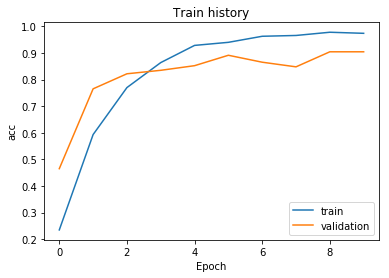

In [7]:
show_train_history(history, 'acc', 'val_acc')

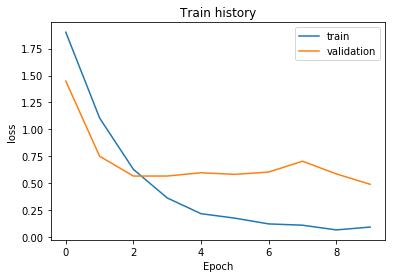

In [8]:
show_train_history(history, 'loss', 'val_loss')

# 預測

https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [68]:
pred_generator = test_datagen.flow_from_directory(
    directory=pred_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),  # all images will be resized
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 84 images belonging to 1 classes.


In [69]:
pred_generator.reset()
pred=model.predict_generator(pred_generator,verbose=1, steps=len(pred_generator))

84/84 [==============================] - 2s 28ms/step


In [25]:
import numpy as np
predicted_class_indices=np.argmax(pred,axis=1)

In [26]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [64]:
predicted_class_indices

array([1, 5, 6, 6, 6, 5, 5, 5, 1, 1, 3, 1, 1, 1, 3, 0, 6, 0, 1, 1, 1, 3,
       1, 5, 1, 3, 2, 2, 5, 1, 2, 1, 1, 3, 5, 3, 1, 6, 6, 1, 1, 1, 1, 2,
       1, 3, 4, 0, 1, 4, 3, 1, 3, 4, 1, 4, 1, 1, 1, 1, 1, 1, 5, 4, 0, 1,
       3, 3, 1, 3, 2, 1, 0, 5, 1, 4, 2, 1, 0, 1, 3, 3, 1, 6], dtype=int64)

In [27]:
import pandas as pd
filenames=pred_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results

,Filename,Predictions
0,pred\bored1.jpg,confused
1,pred\bored10.jpg,neutral
2,pred\bored11.jpg,shocked
3,pred\bored12.jpg,shocked
4,pred\bored2.jpg,shocked
5,pred\bored3.jpg,neutral
6,pred\bored5.jpg,neutral
7,pred\bored6.jpg,neutral
8,pred\bored7.jpg,confused
9,pred\bored8.jpg,confused


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
from sklearn.metrics import confusion_matrix

def label(filename):
    name = filename
    
    if name.find('bored') !=-1:
        return('bored')
        
    if name.find('confused') !=-1:
        return('confused')
        
    if name.find('focus') !=-1:
        return('focus')
        
    if name.find('frustrated') !=-1:
        return('frustrated')
        
    if name.find('happy') !=-1:
        return('happy')

    if name.find('neutral') !=-1:
        return('neutral')
        
    if name.find('shocked') !=-1:
        return('shocked')

l = len(filenames)
def name():
    for x in range(l):
        filenames[x]=label(filenames[x])
        #print(filenames[x])

filenames=pred_generator.filenames
name();
y_true = filenames
y_pred = predictions

df = pd.DataFrame({'true' : y_true ,
                  'pre' : y_pred})

pd.crosstab(df.true, df.pre)





pre,bored,confused,focus,frustrated,happy,neutral,shocked
true,,,,,,,
bored,0,3,0,1,0,4,3
confused,2,7,0,2,0,0,1
focus,0,4,3,2,0,2,0
frustrated,0,6,1,2,0,1,2
happy,1,9,0,2,4,1,0
neutral,2,4,1,3,1,1,0
shocked,1,3,1,2,1,0,1


pre,bored,confused,focus,frustrated,happy,neutral,shocked
true,,,,,,,
bored,0,3,0,1,0,4,3
confused,2,7,0,2,0,0,1
focus,0,4,3,2,0,2,0
frustrated,0,6,1,2,0,1,2
happy,1,9,0,2,4,1,0
neutral,2,4,1,3,1,1,0
shocked,1,3,1,2,1,0,1
